Load dataset

In [564]:
pip install ucimlrepo

In [565]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print("Meta Data\n",adult.metadata)

# variable information
print("Variables\n",adult.variables)

Meta Data
 {'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following condit

Import nessasary libraries

In [566]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # to balance the income
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

create dataframe

In [567]:
df = pd.concat([X, pd.DataFrame(y, columns=['income'])],axis=1)

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [569]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [570]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17721,69,Local-gov,286983,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
21856,35,Private,189240,Some-college,10,Divorced,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
12459,28,Private,221366,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
31365,39,Private,206074,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
28886,38,State-gov,34364,Masters,14,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


Returns a tuple representing the number of rows and columns in the DataFrame

In [571]:
df.shape

(48842, 15)

In [572]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [573]:
df['income'].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [574]:
df['income'].replace({'<=50K.':'<=50K', '>50K.': '>50K'}, inplace = True)

df.replace({'?': np.nan, ' ?': np.nan, '? ': np.nan, ' ? ': np.nan}, inplace = True)

In [575]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [576]:
# Find rows with missing values
missing_values = df[df.isnull().any(axis=1)]
print("Rows with missing values\n", missing_values)

Rows with missing values
        age  workclass  fnlwgt     education  education-num  \
14      40    Private  121772     Assoc-voc             11   
27      54        NaN  180211  Some-college             10   
38      31    Private   84154  Some-college             10   
51      18    Private  226956       HS-grad              9   
61      32        NaN  293936       7th-8th              4   
...    ...        ...     ...           ...            ...   
48769   21        NaN  212661  Some-college             10   
48800   73        NaN  144872       HS-grad              9   
48812   81        NaN   26711     Assoc-voc             11   
48826   50  Local-gov  139347       Masters             14   
48838   64        NaN  321403       HS-grad              9   

              marital-status      occupation    relationship  \
14        Married-civ-spouse    Craft-repair         Husband   
27        Married-civ-spouse             NaN         Husband   
38        Married-civ-spouse         

In [577]:
print("Missing Values ")
df.isna().sum()

Missing Values 


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [578]:
# replacing NaN values with the mode of respective columns
for column in df.columns:
  mode_value = df[column].mode()[0]
  df[column].fillna(mode_value, inplace = True)

print("Missing Values")
print (df.isnull().sum())

Missing Values
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [579]:
# find duplicate values in the dataset
print (df[df.duplicated()])

       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44           Private  3677

In [580]:
df.shape

(48842, 15)

In [581]:
# drop duplicates
df = df.drop_duplicates()

# find duplicate values in the dataset
print (df[df.duplicated()])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [582]:
df.shape

(48789, 15)

In [583]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Visualize distribution of target variable (Income)

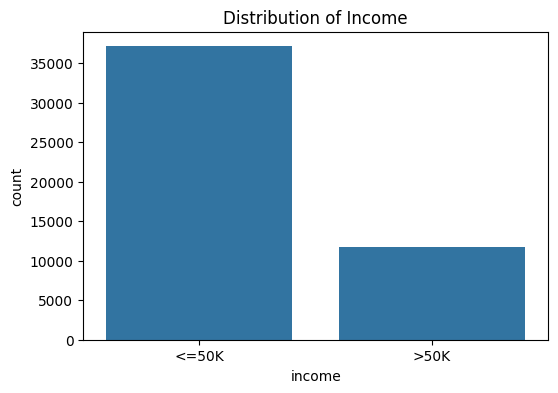

In [584]:
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.show()

Visualize distribution of numerical features

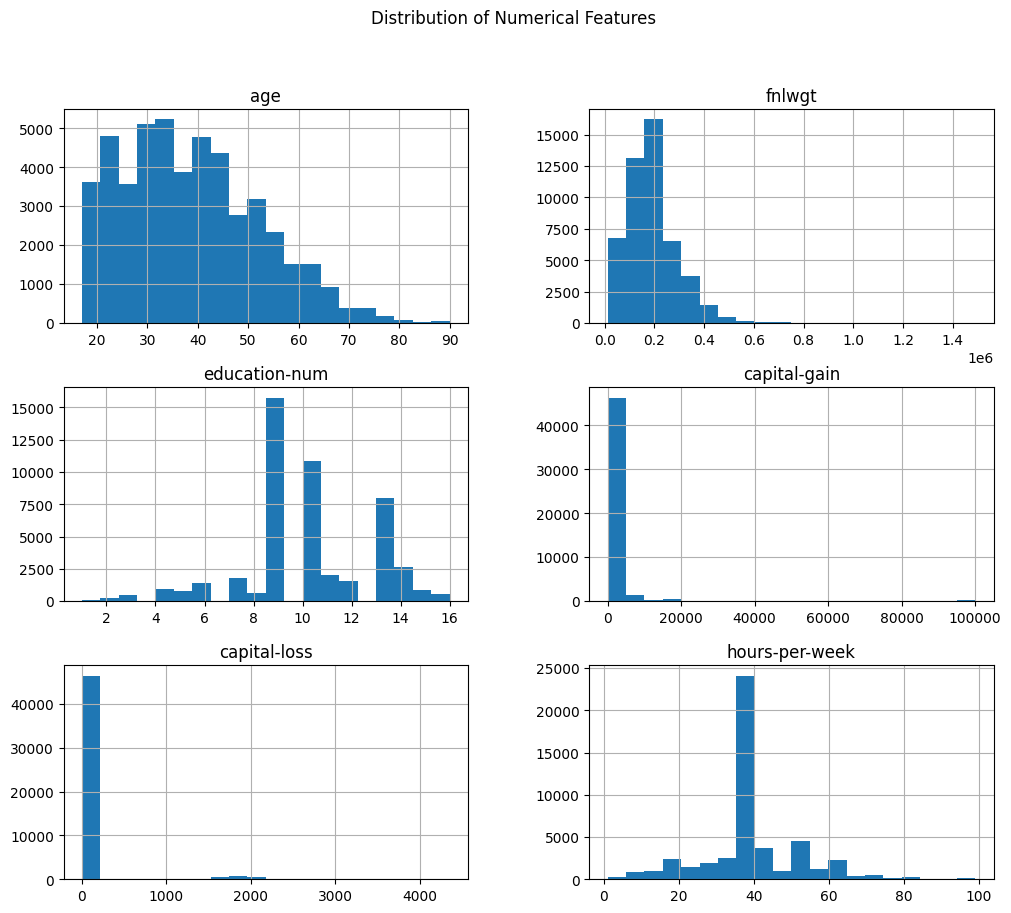

In [585]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

Visualize relationship between numerical features and target

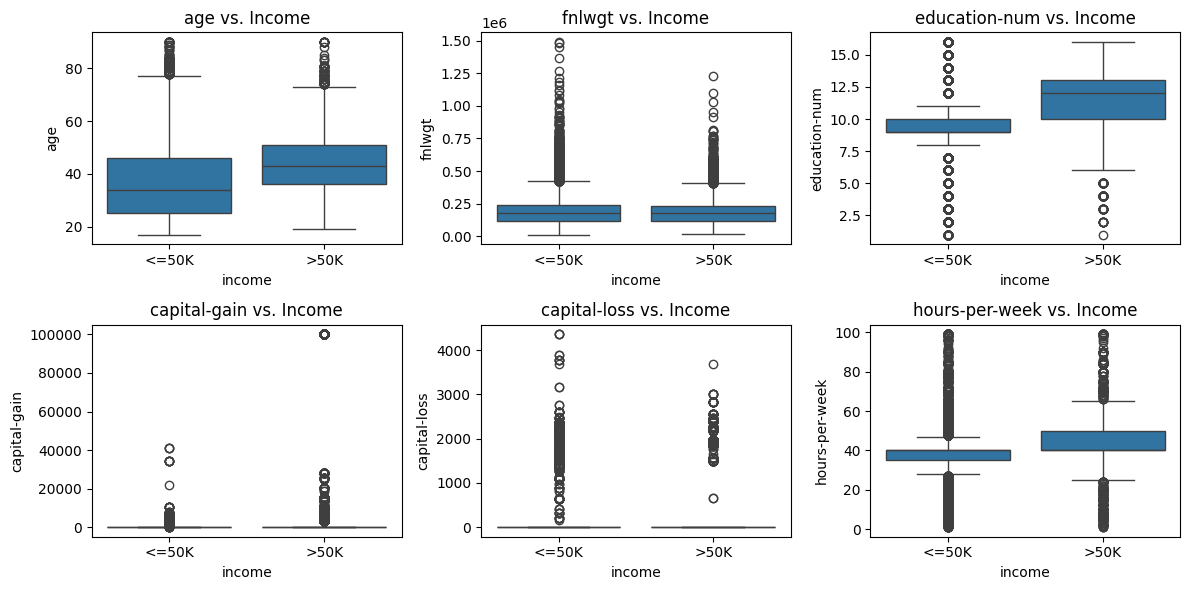

In [586]:
plt.figure(figsize=(12, 6))
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='income', y=feature, data=df)
    plt.title(f'{feature} vs. Income')
plt.tight_layout()
plt.show()

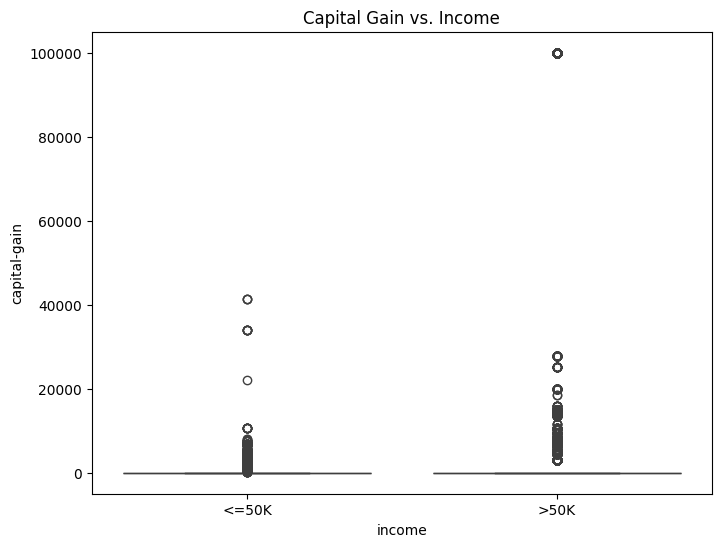

In [587]:
# Create box plot for capital-gain grouped by income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='capital-gain', data=df)
plt.title('Capital Gain vs. Income')
plt.show()

Handle outlier of the capital-gain

In [588]:
print("Before Clipping:")
print(df['capital-gain'].describe())

# Define lower and upper bounds for clipping
lower_bound = df['capital-gain'].quantile(0.0)
upper_bound = df['capital-gain'].quantile(0.97)

# Clip the values of 'capital-gain' column
df['capital-gain'] = df['capital-gain'].clip(lower=lower_bound, upper=upper_bound)

# Verify the changes
print("after Clipping:")
print(df['capital-gain'].describe())

Before Clipping:
count    48789.000000
mean      1080.239829
std       7455.980728
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
after Clipping:
count    48789.000000
mean       464.402734
std       1679.685698
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7688.000000
Name: capital-gain, dtype: float64


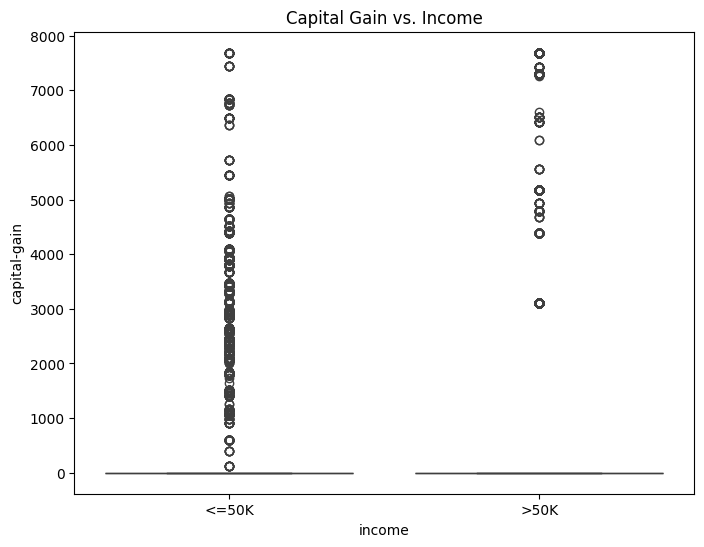

In [589]:
# Create box plot for capital-gain grouped by income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='capital-gain', data=df)
plt.title('Capital Gain vs. Income')
plt.show()

Visualize relationship between categorical features and target

In [ ]:
plt.figure(figsize=(20, 18))
for i, feature in enumerate(df.select_dtypes(include=['object']).columns.tolist()):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, hue='income', data=df)
    plt.title(f'{feature} vs. Income')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print (df[df.duplicated()])

Dropping Unnessasary columns

In [ ]:
df.drop(columns=['fnlwgt', 'education'], inplace=True)

update the value of numeric_features. cuz fnlwgt was removed from the datset

In [ ]:
df.shape

In [ ]:
# find duplicate values in the dataset
print (df[df.duplicated()])

In [ ]:
# drop duplicates
df = df.drop_duplicates()

# find duplicate values in the dataset
print (df[df.duplicated()])

In [ ]:
df.shape

### Categorizing - new dataframe
(df_with_categories)

In [ ]:
df_with_categories = df.copy()
df_with_categories.drop(columns=['native-country', 'occupation'], inplace=True)

In [ ]:
df['native-country'].value_counts()

In [ ]:
# Define mapping for broader country categories
country_mapping = {
    'United-States': 'North America',
    'Mexico': 'North America',
    'Canada': 'North America',
    'Puerto-Rico': 'North America',
    'El-Salvador': 'North America',
    'Dominican-Republic': 'North America',
    'Jamaica': 'North America',
    'Cuba': 'North America',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Philippines': 'Asia',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Vietnam': 'Asia',
    'Taiwan': 'Asia',
    'Iran': 'Asia',
    'Thailand': 'Asia',
    'Hong': 'Asia',
    'Cambodia': 'Asia',
    'Laos': 'Asia',
    'Germany': 'Europe',
    'England': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Greece': 'Europe',
    'Portugal': 'Europe',
    'France': 'Europe',
    'Ireland': 'Europe',
    'Scotland': 'Europe',
    'Hungary': 'Europe',
    'Yugoslavia': 'Europe',
    'South': 'Latin America & Caribbean',
    'Columbia': 'Latin America & Caribbean',
    'Haiti': 'Latin America & Caribbean',
    'Peru': 'Latin America & Caribbean',
    'Ecuador': 'Latin America & Caribbean',
    'Trinadad&Tobago': 'Latin America & Caribbean',
    'Nicaragua': 'Latin America & Caribbean',
    'Outlying-US(Guam-USVI-etc)': 'Others',
    'Holand-Netherlands': 'Others',
}

# Replace specific country names with broader category names
df_with_categories['country-category'] = df['native-country'].replace(country_mapping)

# Verify the changes
print(df_with_categories['country-category'].value_counts())

In [ ]:
df['occupation'].value_counts()

In [ ]:
# Define mapping for broader occupation categories
occupation_mapping = {
    'Prof-specialty': 'White-Collar Jobs',
    'Exec-managerial': 'White-Collar Jobs',
    'Adm-clerical': 'White-Collar Jobs',
    'Tech-support': 'White-Collar Jobs',
    'Craft-repair': 'Blue-Collar Jobs',
    'Machine-op-inspct': 'Blue-Collar Jobs',
    'Transport-moving': 'Blue-Collar Jobs',
    'Handlers-cleaners': 'Blue-Collar Jobs',
    'Sales': 'Sales & Service Jobs',
    'Other-service': 'Sales & Service Jobs',
    'Protective-serv': 'Protective & Security Jobs',
    'Priv-house-serv': 'Protective & Security Jobs',
    'Armed-Forces': 'Protective & Security Jobs',
    'Farming-fishing': 'Farming & Fishing Jobs'
}

# Replace specific occupation names with broader category names
df_with_categories['occupation-category'] = df['occupation'].replace(occupation_mapping)

# Verify the changes
print(df_with_categories['occupation-category'].value_counts())

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df['marital-status'].value_counts()

In [ ]:
df_with_categories.info()

In [ ]:
plt.figure(figsize=(20, 18))
for i, feature in enumerate(df_with_categories.select_dtypes(include=['object']).columns.tolist()):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, hue='income', data=df_with_categories)
    plt.title(f'{feature} vs. Income')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
numeric_features = df_with_categories.select_dtypes(include=[np.number]).columns.tolist()
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='income', y=feature, data=df_with_categories)
    plt.title(f'{feature} vs. Income')
plt.tight_layout()
plt.show()

In [ ]:
# find duplicate values in the dataset
print (df_with_categories[df_with_categories.duplicated()])

In [ ]:
df_with_categories.shape

In [ ]:
# drop duplicates
df_with_categories = df_with_categories.drop_duplicates()

# find duplicate values in the dataset
print (df_with_categories[df_with_categories.duplicated()])

In [ ]:
df_with_categories.shape

In [ ]:
df.info()

In [ ]:
df_with_categories.info()

In [ ]:
df.head()

In [ ]:
df_with_categories.head()

### Normalize/Scale the Numerical Data for both dataframes

To ensure numerical features have a similar scale, preventing bias towards features with larger ranges.

In [ ]:
scaler = StandardScaler()

# Apply scaling to numerical features in both DataFrames
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df[numerical_features] = scaler.fit_transform(df[numerical_features])
df_with_categories[numerical_features] = scaler.fit_transform(df_with_categories[numerical_features])

In [ ]:
df.head()

In [ ]:
df_with_categories.head()

In [ ]:
df.info()

In [ ]:
print("Missing Values ")
df.isna().sum()

In [ ]:
print("Missing Values ")
df_with_categories.isna().sum()

In [ ]:
df.shape

In [ ]:
df_with_categories.shape

### Label Encoding for Categorical Features

To convert categorical features into numerical representations for model compatibility.

In [ ]:
le = LabelEncoder()

# Apply encoding to categorical features in both DataFrames
categorical_features1 = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
categorical_features2 = ['workclass', 'marital-status', 'occupation-category', 'relationship', 'race', 'sex', 'country-category']

for feature in categorical_features1:
    df[feature] = le.fit_transform(df[feature])
for feature in categorical_features2:
    df_with_categories[feature] = le.fit_transform(df_with_categories[feature])

In [ ]:
df.info()

The income column shouldn't be an object type for machine learning modeling. In income prediction, we typically want the income to be a numerical value (e.g., integer or float) representing the annual income. Here's why:

**Model Compatibility:** Most machine learning models for classification tasks expect numerical features and target variables. Representing income as an object type (text) makes it incompatible with these models.


**Loss of Information:** By keeping income as text (e.g., "<=50K" or ">50K"), the model loses valuable information about the actual income amount. It can only learn the relationship between categories, not the specific income values.

In [ ]:
# Create a new binary target variable (0 for <=50K, 1 for >50K)
df['income-binary'] = df['income'].map({'<=50K': 0, '>50K': 1})
df_with_categories['income-binary'] = df_with_categories['income'].map({'<=50K': 0, '>50K': 1})

df.drop(columns=['income'], inplace=True)
df_with_categories.drop(columns=['income'], inplace=True)

In [ ]:
df.info()

In [ ]:
sns.heatmap(df.corr())

In [ ]:
sns.heatmap(df_with_categories.corr())

Check wether the income (target) is balance or not

In [ ]:
df.head()

In [ ]:
# Check class distribution for df
income_counts = df['income-binary'].value_counts()
print(income_counts)

In [ ]:
# Check class distribution for df_with_categories
income_counts_categories = df_with_categories['income-binary'].value_counts()
print(income_counts_categories)

In [ ]:
df.shape

In [ ]:
df_with_categories.shape

Both df and df_with_categories  seem to be imbalanced datasets.

Oversampling might introduce bias with duplicated data, while undersampling discards information. SMOTE offers a balance.

Consider the trade-offs between complexity and effectiveness. SMOTE might be slightly more complex to implement compared to oversampling but can be more effective.

In [ ]:
smote = SMOTE()

# Apply SMOTE to both DataFrames
df, df['income-binary'] = smote.fit_resample(df, df['income-binary'])
df_with_categories, df_with_categories['income-binary'] = smote.fit_resample(df_with_categories, df_with_categories['income-binary'])

SMOTE: This technique creates synthetic data points for the minority class based on existing data points, increasing its representation without simply copying existing samples

In [ ]:
df.shape

In [ ]:
df_with_categories.shape

In [ ]:
df['income-binary'].value_counts()

In [ ]:
df_with_categories['income-binary'].value_counts()

In [ ]:
# find duplicate values in the dataset
print (df[df.duplicated()])

In [ ]:
# find duplicate values in the dataset
print (df_with_categories[df_with_categories.duplicated()])

In [ ]:
# drop duplicates
df_with_categories = df_with_categories.drop_duplicates()
# find duplicate values in the dataset
print (df_with_categories[df_with_categories.duplicated()])

In [ ]:
df_with_categories.shape

In [ ]:
sns.heatmap(df.corr())

In [ ]:
sns.heatmap(df_with_categories.corr())

In [ ]:
def create_boxplots(df, title):
  numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
  rows, cols = 5, 3  # Define the grid size (2 rows, 3 columns)

  fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Create the figure and subplots

  for i, feature in enumerate(numeric_features):
    row, col = divmod(i, cols)  # Calculate row and column indices for each subplot
    sns.boxplot(x='income-binary', y=feature, data=df, ax=axes[row, col])  # Create boxplot on each subplot
    axes[row, col].set_title(f'{feature} vs. Income')  # Set subplot title

  fig.suptitle(title, fontsize=16)  # Add a main title for the entire figure
  plt.tight_layout()
  plt.show()

# Create boxplots for df
create_boxplots(df, 'Boxplots for df')

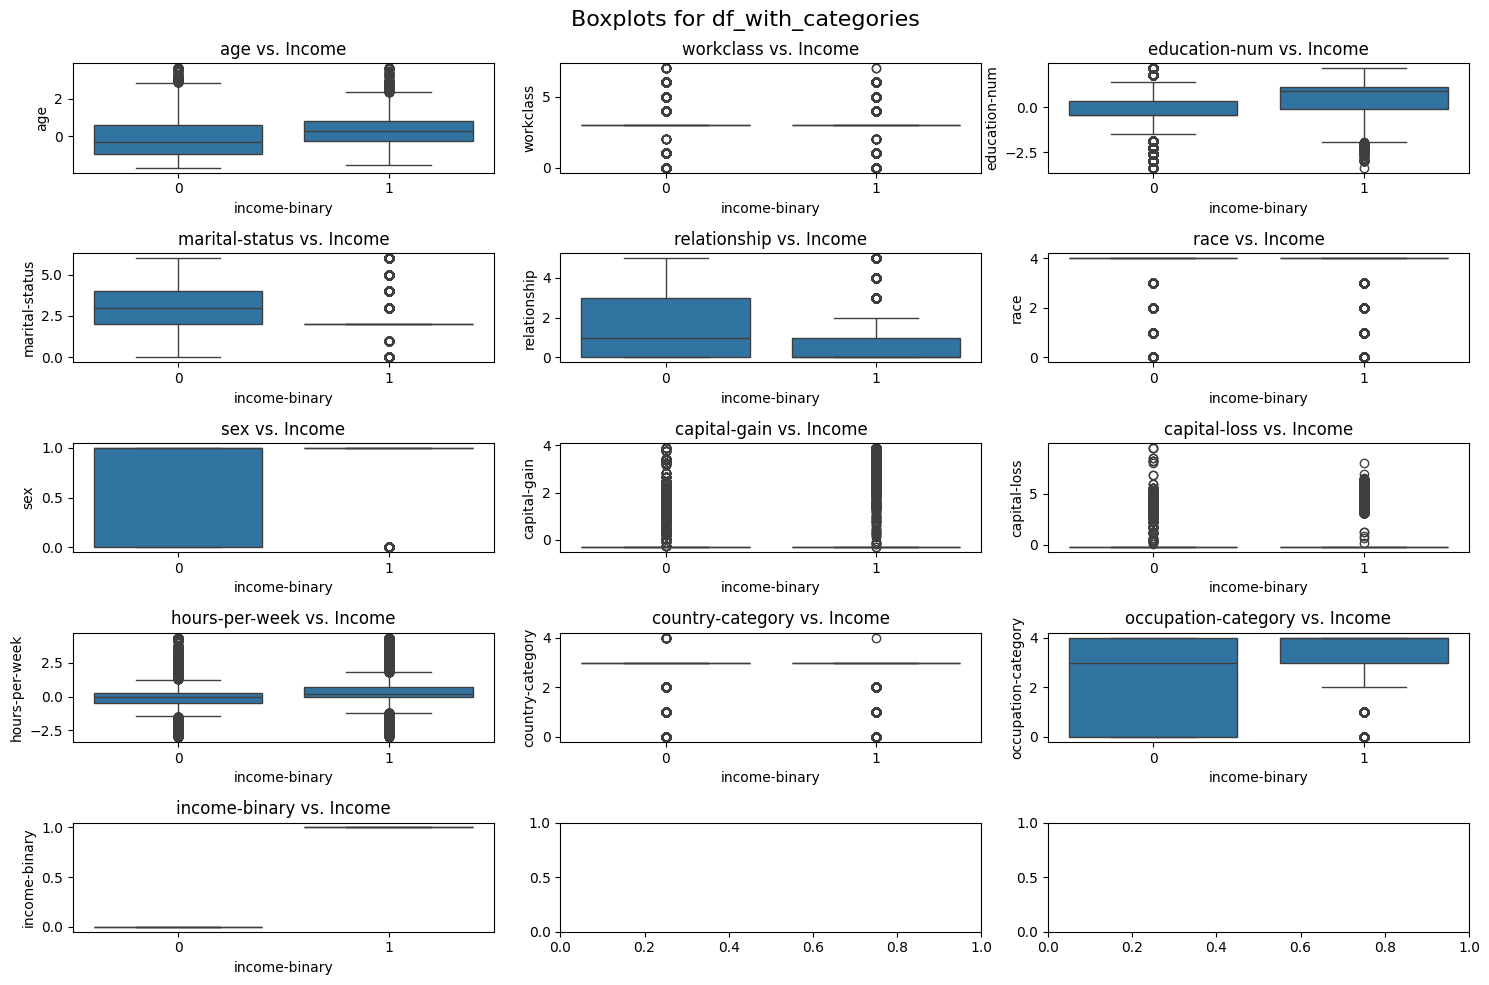

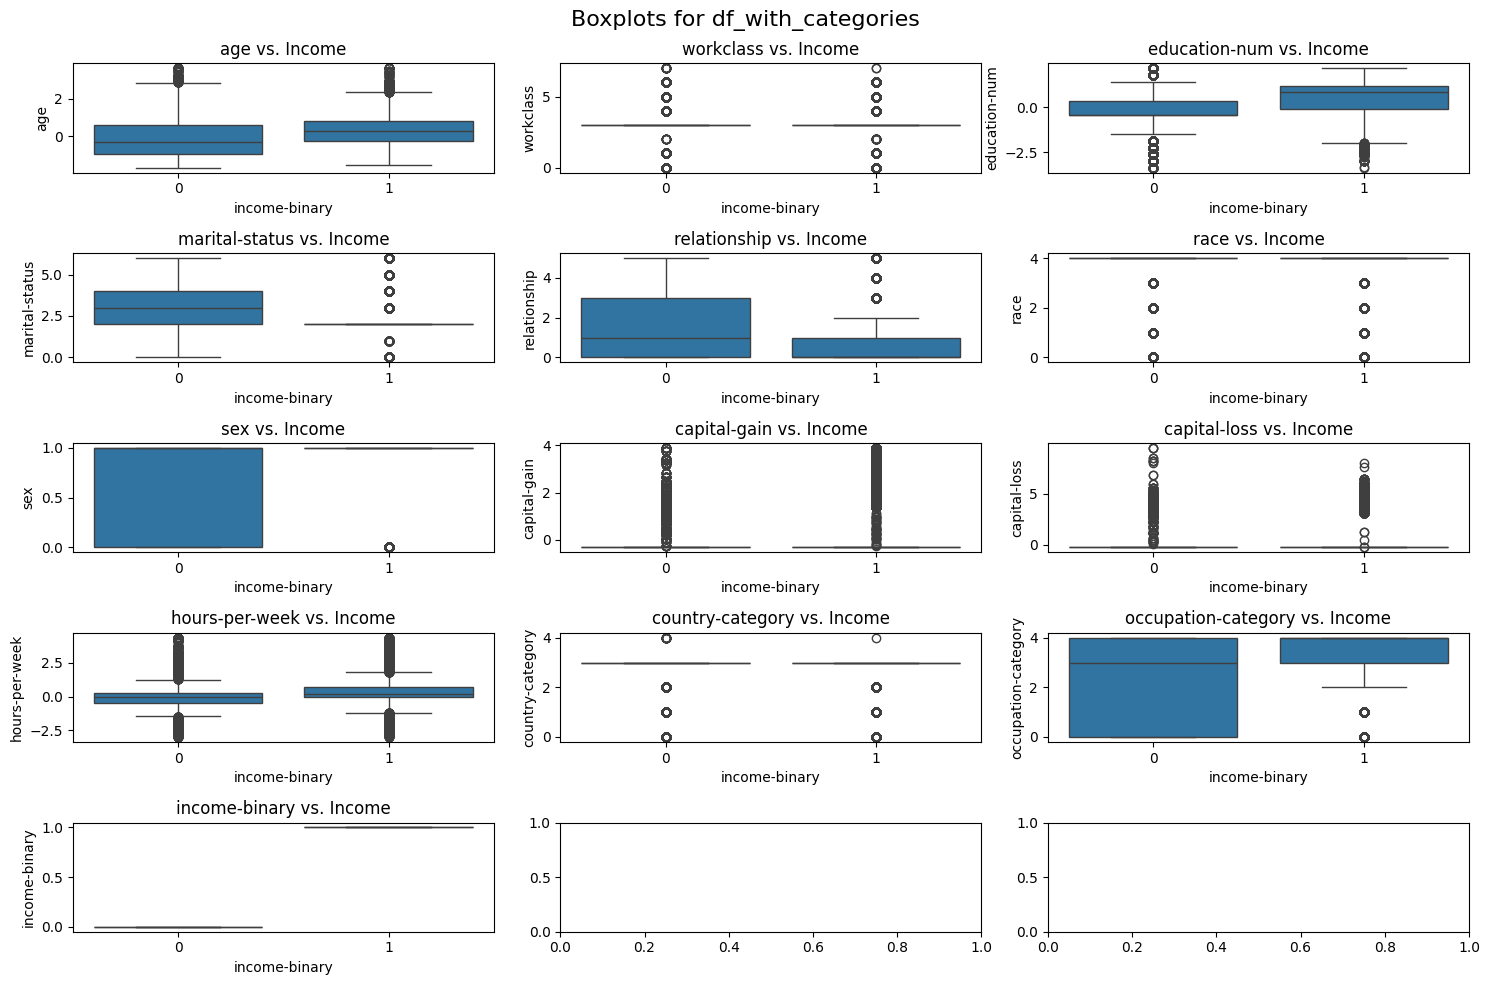

In [556]:
# Create boxplots for df_with_categories
create_boxplots(df_with_categories, 'Boxplots for df_with_categories')

In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63676 entries, 0 to 63675
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             63676 non-null  float64
 1   workclass       63676 non-null  int64  
 2   education-num   63676 non-null  float64
 3   marital-status  63676 non-null  int64  
 4   occupation      63676 non-null  int64  
 5   relationship    63676 non-null  int64  
 6   race            63676 non-null  int64  
 7   sex             63676 non-null  int64  
 8   capital-gain    63676 non-null  float64
 9   capital-loss    63676 non-null  float64
 10  hours-per-week  63676 non-null  float64
 11  native-country  63676 non-null  int64  
 12  income-binary   63676 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.3 MB


In [558]:
df.shape

(63676, 13)

In [559]:
df_with_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57367 entries, 0 to 57415
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  57367 non-null  float64
 1   workclass            57367 non-null  int64  
 2   education-num        57367 non-null  float64
 3   marital-status       57367 non-null  int64  
 4   relationship         57367 non-null  int64  
 5   race                 57367 non-null  int64  
 6   sex                  57367 non-null  int64  
 7   capital-gain         57367 non-null  float64
 8   capital-loss         57367 non-null  float64
 9   hours-per-week       57367 non-null  float64
 10  country-category     57367 non-null  int64  
 11  occupation-category  57367 non-null  int64  
 12  income-binary        57367 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.1 MB


In [560]:
df_with_categories.shape

(57367, 13)

# Split data into training and testing sets

In [561]:
# For df
X_train, X_test, y_train, y_test = train_test_split(df.drop('income-binary', axis=1), df['income-binary'], test_size=0.2, random_state=42)

# For df_with_categories
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df_with_categories.drop('income-binary', axis=1), df_with_categories['income-binary'], test_size=0.2, random_state=42)

# Train Naïve Bayes Model

For df

In [562]:
# Initialize Naïve Bayes classifier
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Predictions on the test set
predictions_nb = naive_bayes.predict(X_test)

# Evaluate model performance
accuracy_nb = accuracy_score(y_test, predictions_nb)
print("Naïve Bayes Model Accuracy:", accuracy_nb)
print(classification_report(y_test, predictions_nb))

Naïve Bayes Model Accuracy: 0.7516488693467337
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      6371
           1       0.81      0.66      0.73      6365

    accuracy                           0.75     12736
   macro avg       0.76      0.75      0.75     12736
weighted avg       0.76      0.75      0.75     12736



For df_with_categories

In [563]:
naive_bayes_cat = GaussianNB()
naive_bayes_cat.fit(X_train_cat, y_train_cat)
predictions_nb_cat = naive_bayes_cat.predict(X_test_cat)
accuracy_nb_cat = accuracy_score(y_test_cat, predictions_nb_cat)
print("Naïve Bayes Model Accuracy (with categories):", accuracy_nb_cat)
print(classification_report(y_test_cat, predictions_nb_cat))

Naïve Bayes Model Accuracy (with categories): 0.7520481087676486
              precision    recall  f1-score   support

           0       0.71      0.86      0.77      5691
           1       0.82      0.65      0.73      5783

    accuracy                           0.75     11474
   macro avg       0.76      0.75      0.75     11474
weighted avg       0.76      0.75      0.75     11474



# Train Random Forest Model

For df

In [ ]:
# Initialize Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predictions on the test set
predictions_rf = random_forest.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Random Forest Model Accuracy:", accuracy_rf)
print(classification_report(y_test, predictions_rf))

For df_with_categories

In [ ]:
random_forest_cat = RandomForestClassifier(random_state=42)
random_forest_cat.fit(X_train_cat, y_train_cat)
predictions_rf_cat = random_forest_cat.predict(X_test_cat)
accuracy_rf_cat = accuracy_score(y_test_cat, predictions_rf_cat)
print("Random Forest Model Accuracy (with categories):", accuracy_rf_cat)
print(classification_report(y_test_cat, predictions_rf_cat))

For df

In [ ]:
print ("For df")
# Split data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(df.drop('income-binary', axis=1), df['income-binary'], test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Train the Random Forest model on training data
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Evaluate on training set
train_predictions = random_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on validation set
val_predictions = random_forest.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

# Compare performance
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Evaluate on test set
test_predictions = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Mitigate overfiiting

In [ ]:
print ("For df")
# Split data into training, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(df.drop('income-binary', axis=1), df['income-binary'], test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Train the Random Forest model on training data with adjusted hyperparameters
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
random_forest.fit(X_train, y_train)

# Evaluate on training set
train_predictions = random_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on validation set
val_predictions = random_forest.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

# Compare performance
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Evaluate on test set
test_predictions = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

In [ ]:
# Train the Naïve Bayes model on training data
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Evaluate on training set
train_predictions_nb = naive_bayes.predict(X_train)
train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)

# Evaluate on validation set
val_predictions_nb = naive_bayes.predict(X_val)
val_accuracy_nb = accuracy_score(y_val, val_predictions_nb)

# Compare performance
print("Training Accuracy (Naïve Bayes):", train_accuracy_nb)
print("Validation Accuracy (Naïve Bayes):", val_accuracy_nb)

# Evaluate on test set
test_predictions_nb = naive_bayes.predict(X_test)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)
print("Test Accuracy (Naïve Bayes):", test_accuracy_nb)

For df_with_categories

In [ ]:
print("For df_with_categories")
# Split data into training, validation, and test sets
X_train_cat, X_val_cat, y_train_cat, y_val_cat = train_test_split(df_with_categories.drop('income-binary', axis=1), df_with_categories['income-binary'], test_size=0.2, random_state=42)
X_test_cat, X_val_cat, y_test_cat, y_val_cat = train_test_split(X_val_cat, y_val_cat, test_size=0.5, random_state=42)

# Train the Random Forest model on training data
random_forest_cat = RandomForestClassifier(random_state=42)
random_forest_cat.fit(X_train_cat, y_train_cat)

# Evaluate on training set
train_predictions_cat = random_forest_cat.predict(X_train_cat)
train_accuracy_cat = accuracy_score(y_train_cat, train_predictions_cat)

# Evaluate on validation set
val_predictions_cat = random_forest_cat.predict(X_val_cat)
val_accuracy_cat = accuracy_score(y_val_cat, val_predictions_cat)

# Compare performance
print("Training Accuracy (with categories):", train_accuracy_cat)
print("Validation Accuracy (with categories):", val_accuracy_cat)

# Evaluate on test set
test_predictions_cat = random_forest_cat.predict(X_test_cat)
test_accuracy_cat = accuracy_score(y_test_cat, test_predictions_cat)
print("Test Accuracy (with categories):", test_accuracy_cat)


In [ ]:
# Train the Naïve Bayes model on training data with categories
naive_bayes_cat = GaussianNB()
naive_bayes_cat.fit(X_train_cat, y_train_cat)

# Evaluate on training set
train_predictions_nb_cat = naive_bayes_cat.predict(X_train_cat)
train_accuracy_nb_cat = accuracy_score(y_train_cat, train_predictions_nb_cat)

# Evaluate on validation set
val_predictions_nb_cat = naive_bayes_cat.predict(X_val_cat)
val_accuracy_nb_cat = accuracy_score(y_val_cat, val_predictions_nb_cat)

# Compare performance
print("Training Accuracy (Naïve Bayes with categories):", train_accuracy_nb_cat)
print("Validation Accuracy (Naïve Bayes with categories):", val_accuracy_nb_cat)

# Evaluate on test set
test_predictions_nb_cat = naive_bayes_cat.predict(X_test_cat)
test_accuracy_nb_cat = accuracy_score(y_test_cat, test_predictions_nb_cat)
print("Test Accuracy (Naïve Bayes with categories):", test_accuracy_nb_cat)